In [19]:
#Write short intro

This project has 3 parts; The model, the algorithm, and the display functionanility. The model is explored first, then the algorithm, and then the display functionality. 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Model Overview

Source: Solving the Rubik’s Cube Without Human Knowledge
Source Link: https://arxiv.org/abs/1805.07470


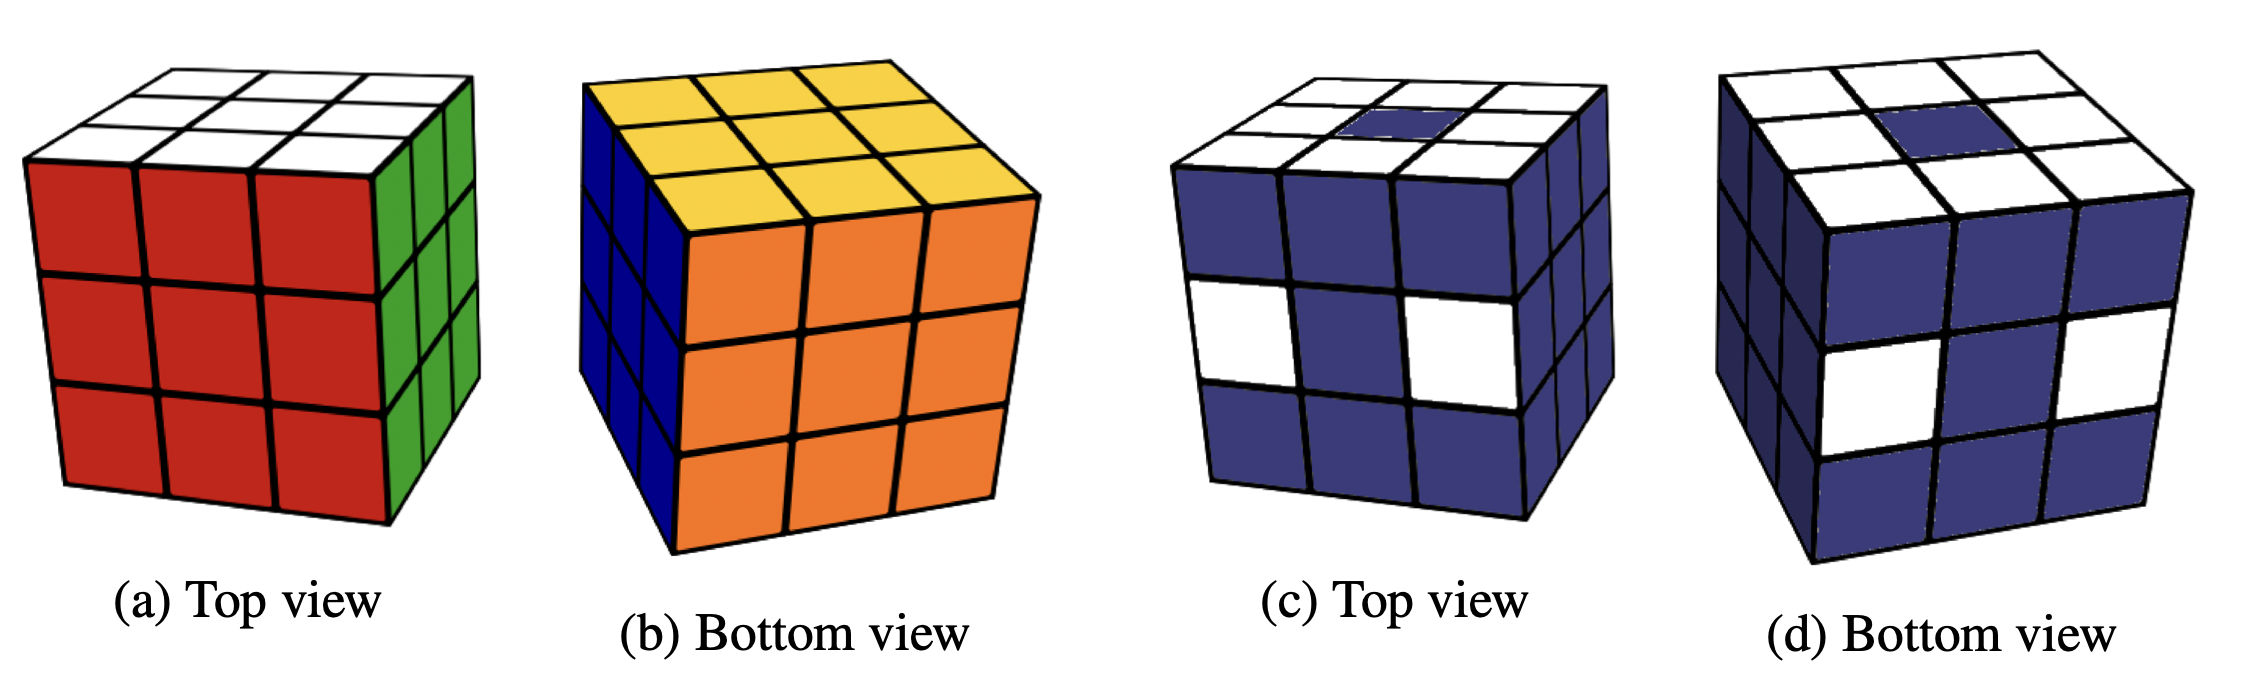

Figure 1: Views a & b show normal cube, views c & d designate pieces
Figure 2: Graphical representation of model


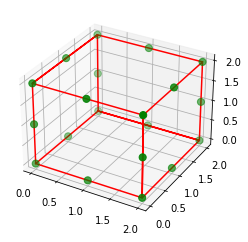

In [54]:
"""Model Visual"""
#Display unique pieces with diagram
from IPython.display import Image, display
print('Source: Solving the Rubik’s Cube Without Human Knowledge')
print('Source Link: https://arxiv.org/abs/1805.07470')
display(Image(filename='scope.png'))
print('Figure 1: Views a & b show normal cube, views c & d designate pieces')

#Plot graphical display of model
fig = plt.figure()
ax = plt.axes(projection='3d')
xdata = []
ydata = []
zdata = []
model = set_completed()

#Create set of unique cube pieces, represented as points
for i in range(3):
    for j in range(3):
        for k in range(3):
            if model[i,j,k]!='xxx':
                loc = decode(model[i,j,k])
                xdata.append(loc[0])
                ydata.append(loc[1])
                zdata.append(loc[2])
ax.scatter3D(xdata,ydata,zdata,c='green',s=50)

#Create cube lines
xline = list('0000022002222022')
yline = list('0220000022002222')
zline = list('0022002222200002')

#convert to ints
x = [int(integer) for integer in xline]
y = [int(integer) for integer in yline]
z = [int(integer) for integer in zline]

ax.plot3D(x,y,z,c='red')
print('Figure 2: Graphical representation of model');

Figure 1 shows a normal cube in views a & b. Views c & d highlight in white the unique pieces of the cube. When thinking of a cube, one thinks of the different colors per piece, each piece has a few different faces which themselves are the different colors. This model does not focus on the faces individually but rather the pieces of the cube. 

Figure 2 shows a graphical representation of the model. The model itself uses 3-dimensional coordinates to both identify a piece and measure that piece's distance from its current position to its final position in a finished cube. The green dots represent each piece while the red lines have been added to show the shape of the cube.

As can be seen in the set_completed function in the cell below, the model is an array of strings. These strings are either a set of 3d coordinates or a non piece (designated as 'xxx'). The comments in the function split the array into 3 3x3 arrarys each denoting the points that exist on the x=0 plane (front plane), the x=1 plane (middle plane) & the x=2 plane (back plane). This corresponds with the 3D plot above as there are 8 points on the x=0 plane, 4 on the x=1 plane, and 8 on the x=2 plane just as there are the same number of pieces per 3x3 array below. The model is then reshaped into a 3x3x3 array.

As the model changes, it is beneficial to know how close it is to its finished state. This is accomplished by the shape of the model array and the format of the each entry of the model array. As previously explored, the model itself is a 3x3x3 array. The shape of the array matches that of figure 2. The red points of figure 2 match the structure of the 3x3x3 array meaning that each point in the plot corresponds to an entry in the array. 

Each entry is a 3 digit string that matches the format 'xyz' where each digit is one digit of a xyz coordinate in the xyz coordinate plane. This allows each piece of the cube to be tracked. For example, if the entry is equal to '020' that means that the entry is the piece who belongs at the intersection of the x=0 plane, the y=2 plane, and the z=0 plane which in figure 2 would be the red dot in the bottom back left corner. Based on its position in the array, we can measure if that entry belongs at that position in the array. For example, if the entry at array position '000'(array[0][0][0]) is equal to '020', then it is not in the right place. Thus the indexing of the array can be compared to the entry to measure if the model is solved or not.

In [23]:
'''General Model Functions''' #Write general descriptions of each function

#Function that sets a completed cube, if displayed, would show a perfect cube
def set_completed():
    compl_log = [#Front plane
                ['000', '001', '002'],
                ['010', 'xxx', '012'],
                ['020', '021', '022'],
                #Middle plane
                ['100', 'xxx', '102'],
                ['xxx', 'xxx', 'xxx'],
                ['120', 'xxx', '122'],
                #Back plane
                ['200', '201', '202'],
                ['210', 'xxx', '212'],
                ['220', '221', '222']]
    
    #format into a 3x3x3 array matching the xyz coordinate plane
    compl_arr = np.array(compl_log,dtype='str_').reshape((3,3,3))
    return compl_arr

"""each entry in the cube array is storred as a string for convenience and needs to 
    be converted to a set of coordinates for calculation"""
def decode(string):
    #(x,y,z)
    return(float(string[0]),float(string[1]),float(string[2]))

#Randomizes the cube model to give the algorithm a cube to solve
def random_cube(A, start=100,stop=200, length = None):
    names = ['F','R','U','L','B','D','Fa','Ra','Ua','La','Ba','Da']
    if length == None:
        turns = np.random.randint(start,stop)
    else:
        turns = length
    record = []
    for i in range(turns):
        j = np.random.randint(0,len(names)-1)
        moves(names[j],A)
        record.append(names[j])
    return A, record

Source: https://ruwix.com/the-rubiks-cube/notation/


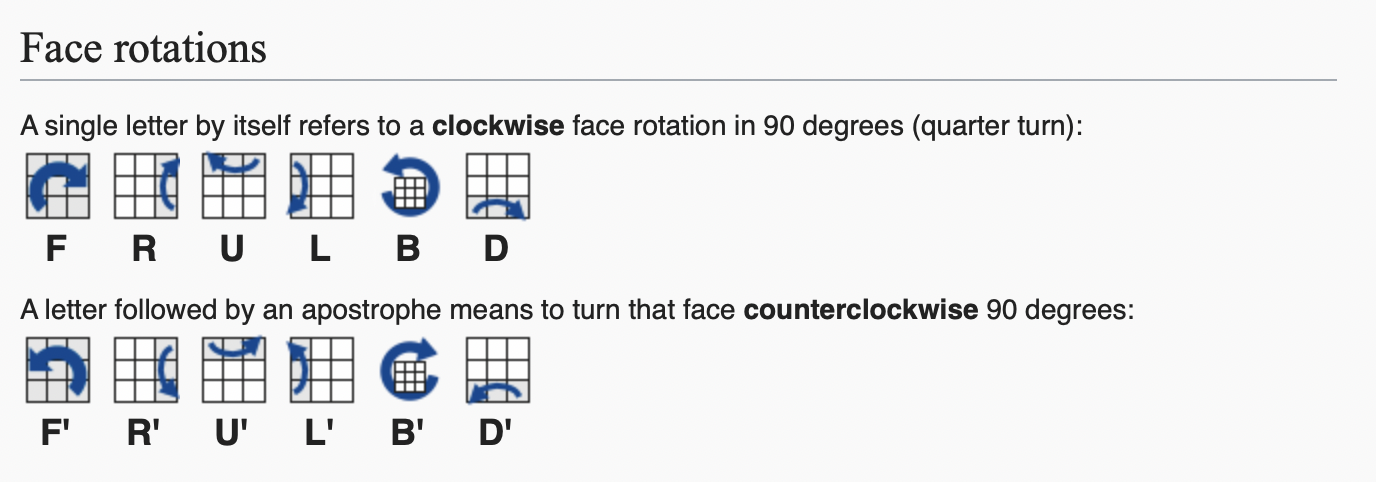

Figure 3: Cube movements


In [55]:
print('Source: https://ruwix.com/the-rubiks-cube/notation/')
display(Image('rotations.png'))
print('Figure 3: Cube movements')

Figure 3 denotes the the 10 possible movements of the cube. The functions below switch rows & columns of the model in an analogous way applying the same changes to the model as the movements apply to a physical cube. The naming convention of the functions matches that of Figure 3 where F of the figure matches the function F() and F' of the figure matches Fa() (F"apostrophe").

In [62]:
'''Rotation Functions'''
def F(A): #Front clockwise
    rightcol = A[0,0,:].copy()
    bottcent = A[0,1,2].copy()
    leftcol = A[0,2,:].copy()
    topcent = A[0,1,0].copy()
    A[0,:,2] = rightcol 
    A[0,2,1] = bottcent
    A[0,:,0] = leftcol
    A[0,0,1] = topcent
def Fa(A): #Front Counterclockwise (F'->Fa)
    toprow = A[0,:,2].copy()
    rightcenter = A[0,2,1].copy()
    bottomrow = A[0,:,0].copy()
    leftcenter = A[0,0,1].copy()
    A[0,0,:] = toprow
    A[0,1,2] = rightcenter
    A[0,2,:] = bottomrow
    A[0,1,0] = leftcenter
def R(A):
    frontrow = A[:,2,2].copy()
    topcenter = A[0,1,2].copy()
    backrow = A[:,0,2].copy()
    bottcenter = A[2,1,2].copy()
    A[0,:,2] = frontrow
    A[1,0,2] = topcenter
    A[2,:,2] = backrow
    A[1,2,2] = bottcenter
def Ra(A):
    toprow = A[2,:,2].copy()
    frontcent = A[1,0,2].copy()
    bottrow = A[0,:,2].copy()
    backcent = A[1,2,2].copy()
    A[:,0,2] = toprow
    A[0,1,2] = frontcent
    A[:,2,2] = bottrow
    A[2,1,2] = backcent
def U(A):
    frontrow = A[:,0,2].copy()
    leftcent = A[0,0,1].copy()
    backrow = A[:,0,0].copy()
    rightcent = A[2,0,1].copy()
    A[0,0,:] = frontrow
    A[1,0,0] = leftcent
    A[2,0,:] = backrow
    A[1,0,2] = rightcent
def Ua(A):
    rightrow = A[0,0,:].copy()
    frontcent = A[1,0,0].copy()
    leftrow = A[2,0,:].copy()
    backcent = A[1,0,2].copy()
    A[:,0,2] = rightrow
    A[0,0,1] = frontcent
    A[:,0,0] = leftrow
    A[2,0,1] = backcent
def L(A):
    frontcol = A[:,0,0].copy()
    topcent = A[2,1,0].copy()
    backcol = A[:,2,0].copy()
    bottcent = A[0,1,0].copy()
    A[0,:,0] = np.flip(frontcol)
    A[1,0,0] = topcent
    A[2,:,0] = np.flip(backcol)
    A[1,2,0] = bottcent
def La(A):
    frontcol = A[:,2,0].copy()
    topcent = A[0,1,0].copy()
    backcol = A[:,0,0].copy()
    bottcent = A[2,1,0].copy()
    A[0,:,0] = frontcol
    A[1,0,0] = topcent
    A[2,:,0] = backcol
    A[1,2,0] = bottcent
def B(A):
    toprow = A[2,:,2].copy()
    rightcenter = A[2,2,1].copy()
    bottomrow = A[2,:,0].copy()
    leftcenter = A[2,0,1].copy()
    A[2,0,:] = toprow
    A[2,1,2] = rightcenter
    A[2,2,:] = bottomrow
    A[2,1,0] = leftcenter 
def Ba(A):
    rightcol = A[2,0,:].copy()
    bottcent = A[2,1,2].copy()
    leftcol = A[2,2,:].copy()
    topcent = A[2,1,0].copy()
    A[2,:,2] = rightcol 
    A[2,2,1] = bottcent
    A[2,:,0] = leftcol
    A[2,0,1] = topcent
def D(A):
    rightrow = A[0,2,:].copy()
    frontcent = A[1,2,0].copy()
    leftrow = A[2,2,:].copy()
    backcent = A[1,2,2].copy()
    A[:,2,2] = rightrow
    A[0,2,1] = frontcent
    A[:,2,0] = leftrow
    A[2,2,1] = backcent
def Da(A):
    frontrow = A[:,2,2].copy()
    leftcent = A[0,2,1].copy()
    backrow = A[:,2,0].copy()
    rightcent = A[2,2,1].copy()
    A[0,2,:] = frontrow
    A[1,2,0] = leftcent
    A[2,2,:] = backrow
    A[1,2,2] = rightcent   

#function to easily apply rotation functions from string input
def moves(name,A):
    if name == 'F':
        F(A)
    elif name ==  'R':
        R(A)
    elif name ==  'U':
        U(A)
    elif name ==  'L':
        L(A)
    elif name == 'B':
        B(A)
    elif name == 'D':
        D(A)
    elif name == 'Fa':
        Fa(A)
    elif name == 'Ra':
        Ra(A)
    elif name == 'Ua':
        Ua(A)
    elif name == 'La':
        La(A)
    elif name == 'Ba':
        Ba(A)
    elif name == 'Da':
        Da(A)

# Algorithm

In [60]:
'''Algorithm Functions'''
import pandas as pd
import itertools
import time

#calculates the distance between two points
def distance(x1,x2):
    d = ((x2[0]-x1[0])**2+(x2[1]-x1[1])**2+(x2[2]-x1[2])**2)**(0.5)
    return d

#converts the model into a series of the distance of a piece's current position to its final position
def dist_series(A):
    index = ['000','001','002','010','012','020','021','022','100','102','120','122',
            '200','201','202','210','212','220', '221','222']
    dist = pd.Series(data = np.zeros(len(index)),index=index)
    for i in range(3):
        for j in range(3):
            for k in range(3):
                goal = A[i,j,k].copy()
                if goal!='xxx':
                    d = distance([i,j,k],decode(goal))
                    dist[goal]=d
    return dist

#calculates the change in distance between two distance series'
def gradient(dpre,dpost):
    return np.average(dpost-dpre)

#scores each potential set of movements to pick the set to apply to the cube
def check_path(A,path,dpre=None): #pass a copy of the cube
    if dpre.all()==None:
        dpre = dist_series(A)
        
    Apre = A.copy()
    for name in path:
        moves(name,A)
    dpost = dist_series(A)
    if (Apre==A).all():
        return 50
    else:
        return gradient(dpre,dpost)

The algorithm checks which path, or set of movements, most closely solves the cube. It measures how close a cube is to being solved by checking the distance between each piece's location in the array to where it's final place is in the solved cube both before and after each path. It averages the difference in distance between each piece and that average becomes the score of each path. The path with the greatest average reduction in distance is chosen and applied to the cube. The process then repeats until the cube is solved or until the max move limit is reached.

Number of Random Moves:  7
Random moves:  ['Ra', 'La', 'Ra', 'Fa', 'Ua', 'U', 'D']
Solved!
# of Moves:  9
Moves:  ['Da', 'F', 'L', 'F', 'Fa', 'R', 'F', 'Fa', 'R']
Program Duration:  1.6  sec or  0.0  min


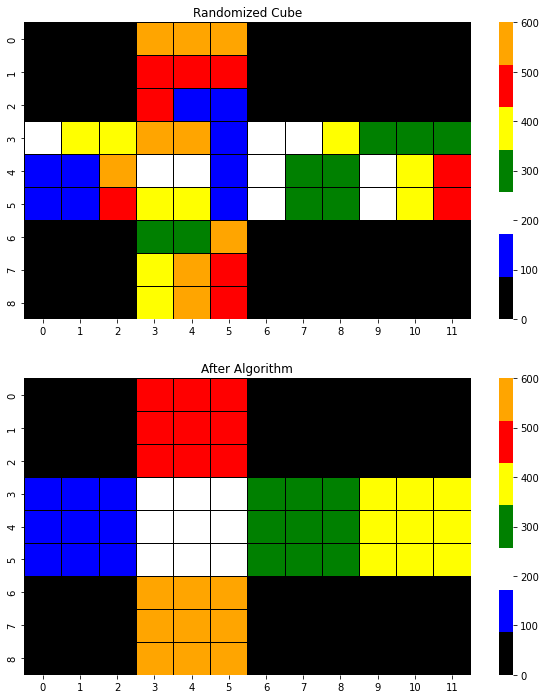

In [87]:
"""Constants"""
#names of movements
names = ['F','R','U','L','B','D','Fa','Ra','Ua','La','Ba','Da','None']

#Completed state
compl = False

#Set perfect cube for completion comparison
standard = set_completed()

#total number of moves
Nmoves=0 

#moves per iteration
nmoves=3

#log of algorithm moves
log = [] 

#generate permutations
paths = list(itertools.permutations(names,nmoves))


"""Randomly create cube"""
cube, log_init = random_cube(set_completed(),length = 7)
print('Number of Random Moves: ',len(log_init))
print('Random moves: ',log_init)

"""Algorithm"""
#Start timer
tic = time.perf_counter() 

#Enter loop
while((not compl)and(Nmoves<50)):
    #check which path to take
    G=100
    
    #Calculate dpre
    dpre = dist_series(cube)
    for i in range(len(paths)):
        g = check_path(cube.copy(),paths[i],dpre=dpre)
        if g<G:
            G = g
            p = i
            
    #Update log
    path = paths[p]
    for i in range(nmoves):
        log.append(path[i])
        
    #apply path to cube
    for name in paths[p]:
        moves(name,cube)
        
    #Update Nmoves
    Nmoves = Nmoves+nmoves
    
    #Update compl
    if (cube==standard).all():
        compl = True
        print('Solved!')

#end algorithm timer
toc = time.perf_counter()

#Save all moves 
LOG = log_init+log

"""Ouptut"""
#Generate display of randomly generated cube (initial state passed to algorithm)
fig, ax = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(10)
ax[0].title.set_text('Randomized Cube')
ax[1].title.set_text('After Algorithm')
plt_display(cube_set(log_init), axes=ax[0])

#Display Results of algorithm
plt_display(cube_set(LOG), axes=ax[1])
print('# of Moves: ',Nmoves)
print('Moves: ',log)
print('Program Duration: ',round(toc-tic,1),' sec or ', round((toc-tic)/60,1),' min')

# Display Functionality

The display functions flatten the three dimensional model and apply the movements to the flattened array. A seaborn heatmap is used to display the flattened array.

Movement functions all for the list of cube movements used by the algorithm to lead directly to the display.

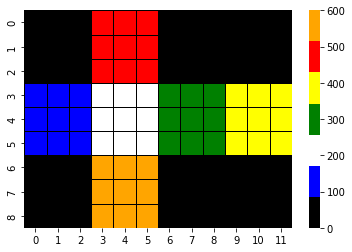

In [70]:
'''Display Demonstration'''
plt_display(gen_disp())

In [33]:
import seaborn as sns

#Created finished cube display
def gen_disp():
    D = np.zeros(108).reshape((9,12))
    D[3:6,:3]= 100 #'B'
    D[3:6,3:6]=200 #'W'
    D[3:6,6:9]=300 #'G'
    D[3:6,9:]=400 #'Y'
    D[:3,3:6]=500 #'R'
    D[6:,3:6]=600 #'O'
    return D

#Display cube
def plt_display(arr,cmap=None, axes=None):
    if cmap == None: cmap = ['black','blue','white','green','yellow','red','orange']
    sns.heatmap(arr,linewidth=1,linecolor=cmap[0], cmap = cmap,ax=axes)

#Display Movements - string of movements creates a display array
def rotate(A, clockwise=True):
    if clockwise:
        A = list(zip(*A[::-1]))
    else:
        for i in range(3): A = list(zip(*A[::-1]))
    return np.array(A).reshape((3,3))

#Display Cube Movements - naming convention DF=Display Face Clockwise
def DF(A): #Front clockwise
    #colors around the face [up&down,left&right]
    shift = A[3,3:].copy()
    move = A[3,:3].copy()
    A[3,9:]=move
    A[3,:9]=shift
    #colors on the face
    face = A[:3,3:6].copy()
    face = rotate(face)
    A[:3,3:6] = face 
    
def DFa(A): #Front Counterclockwise (F'->Fa)
    DF(A)
    DF(A)
    DF(A)
    
def DR(A):
    #fifth col shift up
    shift = A[3:,5].copy()
    movetop = A[:3,5].copy()
    moveback = A[3:6,9].copy()
    A[:6,5] = shift
    A[6:,5] = np.flip(moveback)
    A[3:6,9] = np.flip(movetop)
    #rotate green face
    face = A[3:6,6:9].copy()
    A[3:6,6:9] = rotate(face)
  
def DRa(A):
    DR(A)
    DR(A)
    DR(A)

def DU(A):
    #swap rows
    redrow = A[3:6,8].copy()
    bluerow = A[0,3:6].copy()
    oranrow = A[3:6,0].copy()
    greenrow = A[8,3:6].copy()
    A[0,3:6] = redrow
    A[3:6,0] = np.flip(bluerow)
    A[8,3:6] = np.flip(oranrow)
    A[3:6,8] = greenrow
    #rotate yellow face
    face = A[3:6,9:].copy()
    A[3:6,9:] = rotate(face)    

def DUa(A):
    DU(A)
    DU(A)
    DU(A)
    
def DL(A):
    #swap 3rd column
    yellrow = A[3:6,11].copy()
    redrow = A[:3,3].copy()
    whiterow = A[3:6,3].copy()
    oranrow = A[6:,3].copy()
    A[:3,3] = np.flip(yellrow)
    A[3:6,3] = redrow
    A[6:,3] = whiterow
    A[3:6,11] = np.flip(oranrow)
    #rotate blue face
    face = A[3:6,:3].copy()
    A[3:6,:3] = rotate(face)     

def DLa(A):
    DL(A)
    DL(A)
    DL(A)
    
def DB(A):
    #shift 5th row right
    shift = A[5,:9].copy()
    move = A[5,9:].copy()
    A[5,3:] = shift
    A[5,:3] = move
    #rotate orange face
    face = A[6:,3:6].copy()
    A[6:,3:6] = rotate(face)     

def DBa(A):
    DB(A)
    DB(A)
    DB(A)
    
def DD(A):
    #swap rows
    redrow = A[2,3:6].copy()
    greenrow = A[3:6,6].copy()
    oranrow = A[6,3:6].copy()
    bluerow = A[3:6,2].copy()
    A[3:6,6] = np.flip(redrow)
    A[6,3:6] = np.flip(greenrow)
    A[3:6,2] = oranrow
    A[2,3:6] = bluerow
    #rotate white face
    face = A[3:6,3:6].copy()
    A[3:6,3:6] = rotate(face) 

def DDa(A):
    DD(A)
    DD(A)
    DD(A)
    
def disp_moves(A,name):
    if name == 'F':
        DF(A)
    elif name ==  'R':
        DR(A)
    elif name ==  'U':
        DU(A)
    elif name ==  'L':
        DL(A)
    elif name == 'B':
        DB(A)
    elif name == 'D':
        DD(A)
    elif name == 'Fa':
        DFa(A)
    elif name == 'Ra':
        DRa(A)
    elif name == 'Ua':
        DUa(A)
    elif name == 'La':
        DLa(A)
    elif name == 'Ba':
        DBa(A)
    elif name == 'Da':
        DDa(A)
def cube_set(moves):
    cube = gen_disp()
    for i in moves:
        disp_moves(cube,i)
    return cube